In [1]:
import pandas as pd
import math

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/Users/jianhuitian/Documents/Programs/Anaconda3/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# Read in TTA DataFrame
hourly_tta = pd.read_csv(
    '/Users/jianhuitian/Documents/JianhuiTian/Work/Projects/RealTimeGapForecast/V2/Modeling/hourly_tta_t90d.csv')
hourly_tta['log_median_tta'] = hourly_tta['median_tta'].map(lambda x: math.log(x))

daily_tta = pd.read_csv(
    '/Users/jianhuitian/Documents/JianhuiTian/Work/Projects/RealTimeGapForecast/V2/Modeling/daily_tta_t90d.csv')

In [3]:
hourly_tta.head()

,zone_id,date,dow,hour,median_tta,cld_ratio,del_cld,demand,n_lfw_sessions,sd_ratio,daily_cld,log_median_tta
0,1,2021-11-23 00:00:00,2,2021-11-23 08:00:00,8.7,0.019,5.318615,273.5,313,1.144,0.01,2.163323
1,1,2021-11-23 00:00:00,2,2021-11-23 09:00:00,11.5,0.009,2.561744,271.1,381,1.405,0.01,2.442347
2,1,2021-11-23 00:00:00,2,2021-11-23 10:00:00,10.8,0.009,2.967286,345.9,408,1.180,0.01,2.379546
3,1,2021-11-23 00:00:00,2,2021-11-23 11:00:00,7.7,0.008,2.829763,336.9,487,1.446,0.01,2.041220
4,1,2021-11-23 00:00:00,2,2021-11-23 12:00:00,6.7,0.006,1.927977,338.9,426,1.257,0.01,1.902108


In [4]:
daily_tta.head()

,zone_id,date,median_tta,daily_cld
0,1,2021-11-27,6.0,0.006
1,1,2021-12-09,7.3,0.008
2,1,2021-12-15,7.1,0.008
3,1,2021-12-17,7.5,0.013
4,1,2021-12-28,6.0,0.010


In [5]:
df_hourly_tta = hourly_tta[['zone_id', 'median_tta']].groupby('zone_id').median().reset_index()
df_daily_cld = hourly_tta[['zone_id', 'date', 'daily_cld']].drop_duplicates()[['zone_id', 'daily_cld']]\
                .groupby('zone_id').median().reset_index()
df_daily_tta = daily_tta[['zone_id', 'median_tta']].groupby('zone_id').median().reset_index()\
                .rename(columns={'median_tta':'daily_median_tta'})
df_tta_targets = df_hourly_tta.merge(df_daily_cld,
                                    on=['zone_id'])
df_tta_targets = df_tta_targets.merge(df_daily_tta,
                                     on=['zone_id'])
df_tta_targets.dropna(axis=0, inplace=True)

In [6]:
df_tta_targets.head(10)

,zone_id,median_tta,daily_cld,daily_median_tta
0,1,4.90,0.0090,5.60
1,13,2.40,0.0100,2.70
2,14,2.90,0.0090,3.20
3,16,1.50,0.0060,1.40
4,18,0.90,0.0100,0.80
5,27,1.20,0.0100,1.20
6,28,1.40,0.0110,1.45
7,32,3.15,0.0165,3.15
8,33,0.60,0.0050,0.60
9,37,2.10,0.0070,2.20


In [7]:
df_tta_targets.isnull().sum()

zone_id             0
median_tta          0
daily_cld           0
daily_median_tta    0
dtype: int64

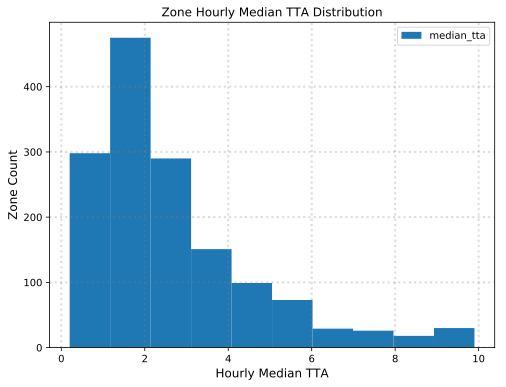

In [8]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.hist(df_tta_targets[df_tta_targets['median_tta'] < 10.0]['median_tta'])
ax1.set_xlabel('Hourly Median TTA',fontsize=12)
ax1.set_ylabel('Zone Count',fontsize=12)
ax1.set_title('Zone Hourly Median TTA Distribution')
ax1.legend(loc='upper right')
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)
plt.show()

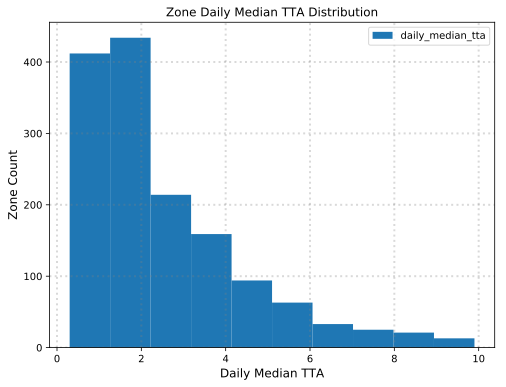

In [9]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.hist(df_tta_targets[df_tta_targets['daily_median_tta'] < 10.0]['daily_median_tta'])
ax1.set_xlabel('Daily Median TTA',fontsize=12)
ax1.set_ylabel('Zone Count',fontsize=12)
ax1.set_title('Zone Daily Median TTA Distribution')
ax1.legend(loc='upper right')
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)
plt.show()

In [10]:
t = len(hourly_tta)
t3 = len(hourly_tta[hourly_tta['median_tta'] > 3])
print('Total hourly TTA records:')
print(t)

print('\nTotal hourly TTA records > 3.0:')
print(t3)
print('Percentange:')
print(round(t3 / t, 3))

Total hourly TTA records:
1345130

Total hourly TTA records > 3.0:
541654
Percentange:
0.403


In [11]:
zid = 975
t = len(hourly_tta[hourly_tta['zone_id'] == zid])
t3 = len(hourly_tta[(hourly_tta['zone_id'] == zid) & (hourly_tta['median_tta'] > 3)])

print('Total hourly TTA records:')
print(t)

print('\nTotal hourly TTA records > 3.0:')
print(t3)
print('Percentange:')
print(round(t3 / t, 3))

Total hourly TTA records:
709

Total hourly TTA records > 3.0:
315
Percentange:
0.444


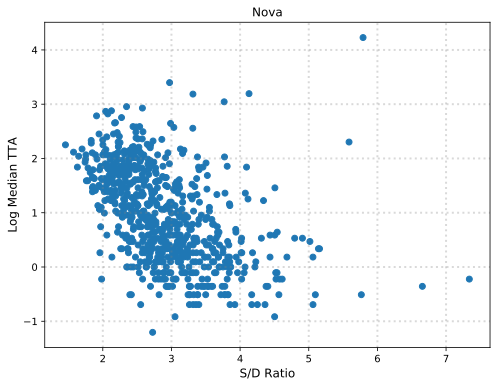

In [12]:
zones = {973: 'Brooklyn Queens',
861:'Philly',
974:'Chicago',
785:'Orange County',
942:'San Diego',
972:'West LA',
943:'Denver',
989:'St. Louis',
839:'Sacramento',
975:'Nova',
714:'Raleigh Durham',
983:'East LA'}
zid = 975

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(hourly_tta[hourly_tta['zone_id'] == zid]['sd_ratio'],
              hourly_tta[hourly_tta['zone_id'] == zid]['log_median_tta'])
ax1.set_xlabel('S/D Ratio',fontsize=12)
ax1.set_ylabel('Log Median TTA',fontsize=12)
ax1.set_title(zones[zid])
# ax1.legend(loc='upper right')
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)
plt.show()

In [13]:
hourly_tta.head()

,zone_id,date,dow,hour,median_tta,cld_ratio,del_cld,demand,n_lfw_sessions,sd_ratio,daily_cld,log_median_tta
0,1,2021-11-23 00:00:00,2,2021-11-23 08:00:00,8.7,0.019,5.318615,273.5,313,1.144,0.01,2.163323
1,1,2021-11-23 00:00:00,2,2021-11-23 09:00:00,11.5,0.009,2.561744,271.1,381,1.405,0.01,2.442347
2,1,2021-11-23 00:00:00,2,2021-11-23 10:00:00,10.8,0.009,2.967286,345.9,408,1.180,0.01,2.379546
3,1,2021-11-23 00:00:00,2,2021-11-23 11:00:00,7.7,0.008,2.829763,336.9,487,1.446,0.01,2.041220
4,1,2021-11-23 00:00:00,2,2021-11-23 12:00:00,6.7,0.006,1.927977,338.9,426,1.257,0.01,1.902108


In [14]:
# Production 
# Create Dummy DoW variables
hourly_tta = hourly_tta.join(pd.get_dummies(hourly_tta['dow'], prefix='dow'))

# S/D Ratio <= 4.5
hourly_tta = hourly_tta[hourly_tta['sd_ratio'] <= 4.5]

In [15]:
# Model for each zone
zones = {973: 'Brooklyn Queens',
861:'Philly',
974:'Chicago',
785:'Orange County',
942:'San Diego',
972:'West LA',
943:'Denver',
989:'St. Louis',
839:'Sacramento',
975:'Nova',
714:'Raleigh Durham',
983:'East LA',
289:'Louisville', # About t7d 10K deliveries
223:'OFallon St Peters',
696:'Modesto',
324:'Grosse Point',
385:'Frankfort', # About t7d 5000 deliveries
358:'Rockwall',
391:'South Shore',
516:'Des Moines IA',
427:'Kent'}
zid = 973

# Model Training
from sklearn.linear_model import RidgeCV
import time

_features = ['sd_ratio', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6']
_label = 'log_median_tta'

train_data = hourly_tta[hourly_tta['zone_id'] == zid][_features]
train_label = hourly_tta[hourly_tta['zone_id'] == zid][_label]

# Define Model Parameters
tic = time.perf_counter()
grid = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=10)
grid.fit(train_data, train_label)
toc = time.perf_counter()
print(f"Finished training in {toc - tic:0.4f} seconds")

if False:
    # Save to local
    if os.environ.get("LORE_ENV") == 'development':
        pickle.dump(grid,
                    open('./medley/realtime_gap_forecast/production/v1/model/' + self._filename_lr, 'wb'))

    # Save to S3
    # Save to S3
    with open(self._filename_lr, 'wb') as f:
        pickle.dump(grid, f)
    pathname = os.path.join('realtime_gap_forecast', self._filename_lr)
    lore.io.upload(self._filename_lr, pathname)
    os.remove(self._filename_lr)

    self._linear_model = grid

print({_k: round(_v, 4) for _k, _v in zip(_features, grid.coef_)})
print(grid.alpha_)

/Users/jianhuitian/Documents/Programs/Anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/Users/jianhuitian/Documents/Programs/Anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/

Finished training in 0.1562 seconds
{'sd_ratio': -0.4978, 'dow_1': 0.056, 'dow_2': -0.0089, 'dow_3': -0.0406, 'dow_4': -0.0846, 'dow_5': -0.0996, 'dow_6': 0.062}
100.0


In [16]:
print({_k: round(_v, 4) for _k, _v in zip(_features, grid.coef_)})
print(round(grid.intercept_, 3))
print(grid.alpha_)

{'sd_ratio': -0.4978, 'dow_1': 0.056, 'dow_2': -0.0089, 'dow_3': -0.0406, 'dow_4': -0.0846, 'dow_5': -0.0996, 'dow_6': 0.062}
1.734
100.0


Check feature 0 is sd_ratio.
sd_ratio


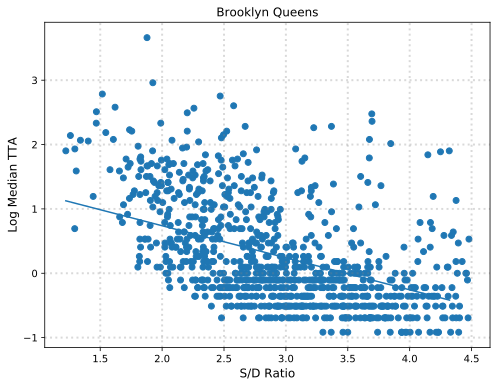

In [17]:
print('Check feature 0 is sd_ratio.')
print(_features[0])
sd_ratio_max = hourly_tta[hourly_tta['zone_id'] == zid]['sd_ratio'].max() 
sd_ratio_min = hourly_tta[hourly_tta['zone_id'] == zid]['sd_ratio'].min()
x_arr = [sd_ratio_min + 0.1 * i for i in range(int((sd_ratio_max - sd_ratio_min) / 0.1))]
y_arr = [grid.intercept_ + grid.coef_[0] * i for i in x_arr]
y1_arr = [3.483 + -1.504 * i for i in x_arr]

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(hourly_tta[hourly_tta['zone_id'] == zid]['sd_ratio'],
              hourly_tta[hourly_tta['zone_id'] == zid]['log_median_tta'])
ax1.plot(x_arr, y_arr)
# ax1.plot(x_arr, y1_arr)
ax1.set_xlabel('S/D Ratio',fontsize=12)
ax1.set_ylabel('Log Median TTA',fontsize=12)
ax1.set_title(zones[zid])
# ax1.legend(loc='upper right')
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)
plt.show()